In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

<h1> Исследование Данных </h1>

In [20]:
data = pd.read_csv('heart.csv')
data.head(10) #first 10 examples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


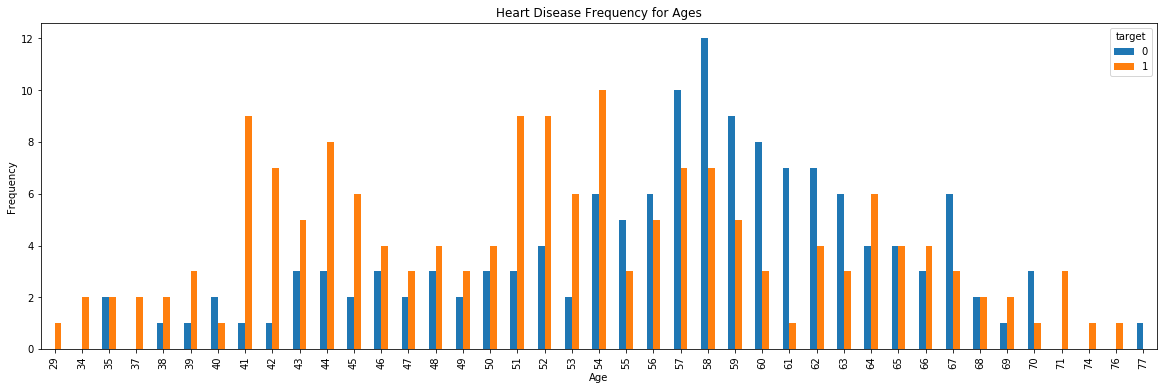

In [22]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

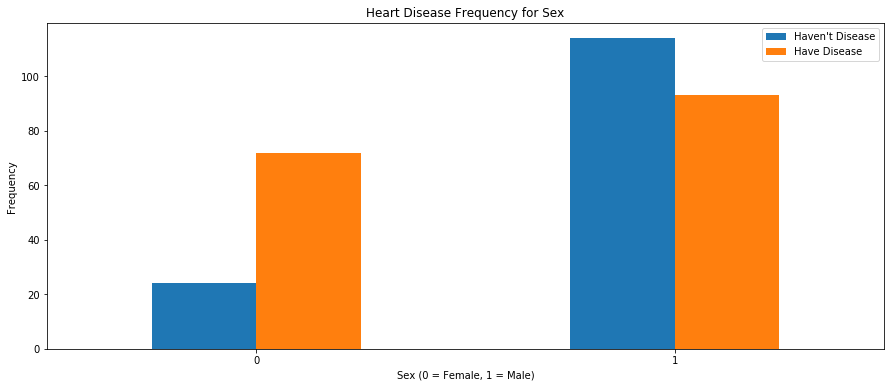

In [23]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndSex.png')
plt.show()

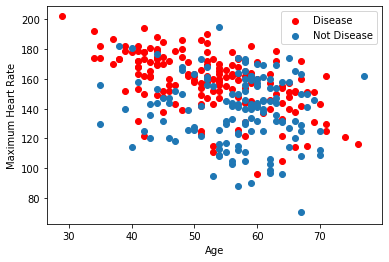

In [14]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.savefig('MHRAndAge.png')
plt.show()

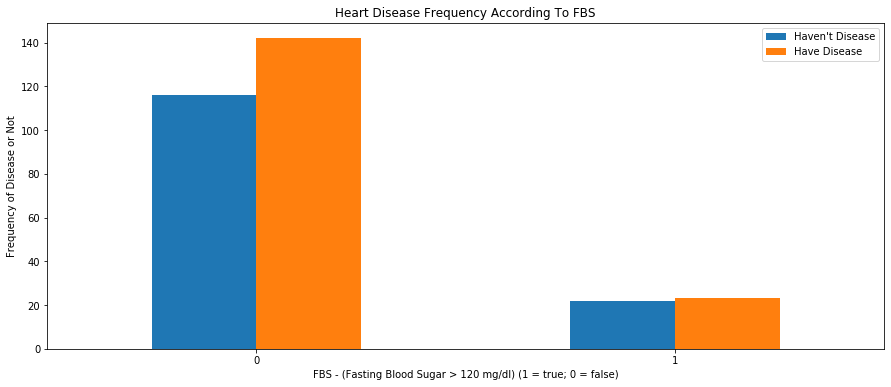

In [24]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.savefig('heartDiseaseAndFBS.png')
plt.show()

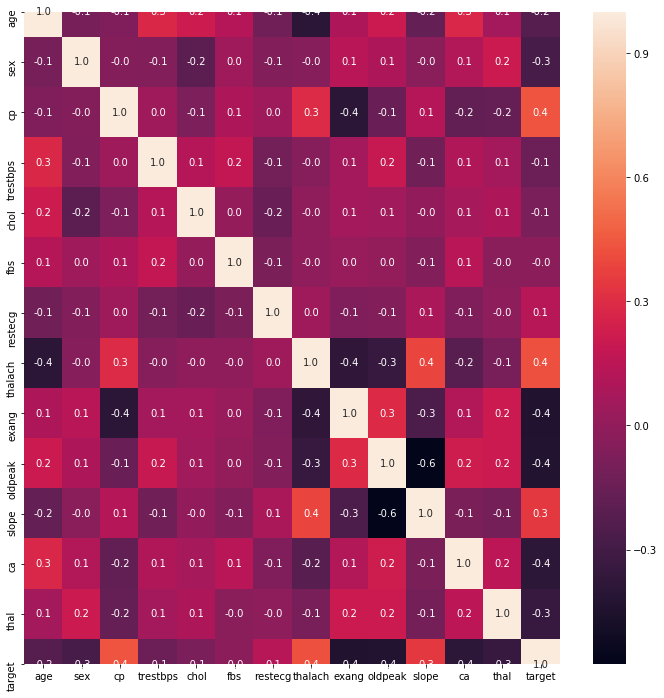

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.savefig('Corr.png')
plt.show()

<h1> Обучение моделей </h1>

In [79]:
def get_scores(D, estimators):
    idx = np.random.randint(len(D), size=30)
    d_test = D[idx, :]
    x_test = d_test[:, :-1]
    y_test = d_test[:, -1]
    
    ys_pred = []
    
    for estimator in estimators:
        y_pred = estimator.predict(x_test)
        ys_pred.append(y_pred)
    
    return calc_scores(np.array(ys_pred), y_test) 


def calc_scores(ys_pred, y_true):
    f1, precision, recall = [], [], []
    
    for y_pred in ys_pred:
        f1.append(f1_score(y_true, y_pred))
        recall.append(recall_score(y_true, y_pred))
        precision.append(precision_score(y_true, y_pred))
        
    return np.array(f1).mean(), np.array(recall).mean(), np.array(precision).mean()

In [26]:
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] #get numerical columns
num_data = data[num_col]
num_data = (num_data - num_data.mean()) / (num_data.std()) # data standartizaiton


In [27]:
num_data.head(10)

,age,trestbps,chol,thalach,oldpeak
0,0.950624,0.762694,-0.255910,0.015417,1.085542
1,-1.912150,-0.092585,0.072080,1.630774,2.119067
2,-1.471723,-0.092585,-0.815424,0.975900,0.310399
3,0.179877,-0.662770,-0.198030,1.237849,-0.206364
4,0.289984,-0.662770,2.078611,0.582975,-0.378618
5,0.289984,0.477601,-1.046947,-0.071899,-0.550872
6,0.179877,0.477601,0.920997,0.146392,0.224272
7,-1.141403,-0.662770,0.322897,1.019558,-0.895381
8,-0.260549,2.302196,-0.911892,0.539317,-0.464745
9,0.289984,1.047787,-1.509992,1.063216,0.482653


In [29]:
cat_col = ['cp', 'restecg', 'slope', 'ca', 'thal'] #get categorical columns 
cat_data = data[cat_col]

onehot_encoder = OneHotEncoder(sparse=False)

cat_data = pd.DataFrame(onehot_encoder.fit_transform(cat_data))# encode them
cat_data.head()

/home/maksim/Документы/Projects/ML_env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
D = np.hstack((num_data.values, cat_data.values, data.target.values.reshape((len(data), 1))))
np.random.shuffle(D)

array([-1.14140292, -0.66277043, -1.49069857, -0.24653242,  1.51617769,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

In [40]:
X = D[:, :-1]
y = D[:, -1]

In [88]:
log_reg = LogisticRegression()
cv_results1 = cross_validate(log_reg, X, y, cv=5, return_estimator=True)
f1_1, recall_1, precision_1 = get_scores(D, cv_results1['estimator'])
print('Precision', precision_1)
print('Recall', recall_1)
print('F1 мера', f1_1)
print('Время обучения', cv_results1['fit_time'].sum())
print('Accuracy', cv_results1['test_score'].mean())

Precision 0.8254901960784313
Recall 0.8875
F1 мера 0.8552584670231729
Время обучения 0.011330842971801758
Accuracy 0.8447540983606558


In [91]:
svc = SVC(kernel='sigmoid')
cv_results2 = cross_validate(svc, X, y, cv=5, return_estimator=True)
f1_2, recall_2, precision_2 = get_scores(D, cv_results2['estimator'])
print('Precision', precision_2)
print('Recall', recall_2)
print('F1 мера', f1_2)
print('Время обучения', cv_results2['fit_time'].sum())
print('Accuracy', cv_results2['test_score'].mean())

Precision 0.8647619047619048
Recall 0.9142857142857144
F1 мера 0.8886699507389164
Время обучения 0.0218508243560791
Accuracy 0.8316939890710383


In [93]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=3)
cv_results3 = cross_validate(rfc, X, y, cv=5, return_estimator=True)
f1_3, recall_3, precision_3 = get_scores(D, cv_results3['estimator'])
print('Precision', precision_3)
print('Recall', recall_3)
print('F1 мера', f1_3)
print('Время обучения', cv_results3['fit_time'].sum())
print('Accuracy', cv_results3['test_score'].mean())

Precision 0.8919117647058823
Recall 0.925
F1 мера 0.9079545454545453
Время обучения 0.32215142250061035
Accuracy 0.8250273224043717
